<a href="https://colab.research.google.com/github/makhmudov-khondamir/Machine-Learning-Projects/blob/main/14.%20Sentiment%20Analysis%20of%20Movie%20Reviews%20Using%20Pre-Trained%20AWD-LSTM%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title:Sentiment Analysis of Movie Reviews Using Pre-Trained AWD-LSTM Model(NLP)**

### Issue
The project addresses the challenge of automatically classifying movie reviews as positive or negative using natural language processing (NLP) techniques.

In [1]:
import torch
import fastai

In [2]:
from fastai.text.all import *

In [6]:
path=untar_data(URLs.IMDB)
path.ls()

(#7) [Path('/root/.fastai/data/imdb/tmp_clas'),Path('/root/.fastai/data/imdb/imdb.vocab'),Path('/root/.fastai/data/imdb/unsup'),Path('/root/.fastai/data/imdb/test'),Path('/root/.fastai/data/imdb/tmp_lm'),Path('/root/.fastai/data/imdb/README'),Path('/root/.fastai/data/imdb/train')]

In [5]:
dls=TextDataLoaders.from_folder(path,train='train', valid='test')
learn=text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.466406,0.411429,0.812480,03:18


epoch,train_loss,valid_loss,accuracy,time
0,0.318051,0.238483,0.903920,06:54
1,0.235513,0.225245,0.911240,06:54
2,0.187433,0.190046,0.927880,06:55
3,0.159438,0.195618,0.928640,06:55


In [20]:
review,_,prob=learn.predict('I got to tell you, it was perfect. Perfect. Everything, down to the last minute details')
print(f'Review: {review}')
print(f'Probability: {prob[1].item():.6f}')

Review: neg
Probability: 0.432882


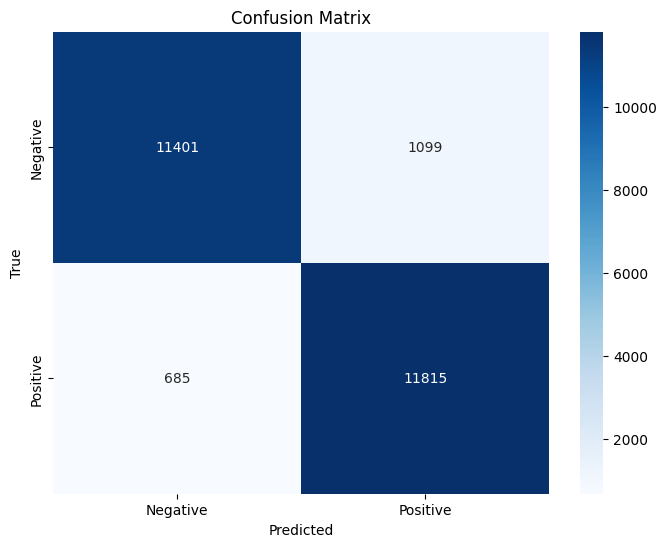

              precision    recall  f1-score   support

    Negative       0.94      0.91      0.93     12500
    Positive       0.91      0.95      0.93     12500

    accuracy                           0.93     25000
   macro avg       0.93      0.93      0.93     25000
weighted avg       0.93      0.93      0.93     25000



In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on validation data
preds, targs = learn.get_preds()

# Convert predictions and targets to numpy arrays
preds = preds.argmax(dim=1).numpy()
targs = targs.numpy()

# Calculate confusion matrix
cm = confusion_matrix(targs, preds, labels=[0, 1])
labels = ['Negative', 'Positive']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(targs, preds, target_names=labels))


# **Explanation and answers to common questions**

## **Explanation**
```python
from fastai.text.all import *
```

**Purpose:** Importing necessary tools for text processing and model building.


### Downloading the Dataset
```python
path=untar_data(URLs.IMDB)
path.ls()
```
**What it does:**
- `untar_data(URLs.IMDB)`: Downloads and extracts the IMDB dataset, a popular dataset for sentiment analysis.
- `path.ls()`: Lists the contents of the path where the dataset is stored.

**Purpose:** To get the dataset needed for training the model.

**Where it comes from:** The `untar_data` function is part of the FastAI library, and `URLs.IMDB` is a predefined constant in FastAI pointing to the IMDB dataset.

**Example:** Suppose you have a zipped file of text reviews. This line downloads and unzips the file, providing access to the reviews.

### Creating DataLoaders
```python
dls=TextDataLoaders.from_folder(path,train='train', valid='test')
```
**What it does:** Creates DataLoaders for training and validation datasets from the specified folders.

**Purpose:** To load and preprocess the text data for training the model. DataLoaders handle batching, shuffling, and other operations needed for training.

**Example:** If you have two folders `train` and `test`, each containing text files for training and validation, this line will read those files and prepare them for model training.

### Creating and Training the Model
```python
learn=text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 0.01)
```
**What it does:**
- `text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)`: Creates a text classification learner using the AWD_LSTM architecture.
- `learn.fine_tune(4, 0.01)`: Fine-tunes the model for 4 epochs with a learning rate of 0.01.

**Purpose:** To create and train a neural network model for classifying text as positive or negative.

**Where it comes from:** `text_classifier_learner` is a function in FastAI that creates a text classification model. `AWD_LSTM` is a type of LSTM (Long Short-Term Memory) neural network architecture.

**Example:** Imagine you are training a model to classify movie reviews as positive or negative. This line sets up and trains the model using the provided data and architecture.

##**Detailed Explanation and Example**

#### 1. Importing Libraries
When you run `from fastai.text.all import *`, it loads functions and classes like `TextDataLoaders`, `text_classifier_learner`, and `untar_data`, which are essential for NLP tasks in FastAI.

#### 2. Downloading the Dataset
```python
path=untar_data(URLs.IMDB)
```
This line downloads the IMDB dataset. The IMDB dataset contains 50,000 movie reviews, split evenly into 25,000 training and 25,000 test reviews. `path.ls()` will show you the contents, like 'train' and 'test' folders.

#### 3. Creating DataLoaders
```python
dls=TextDataLoaders.from_folder(path,train='train', valid='test')
```
This line creates DataLoaders from the IMDB dataset. DataLoaders handle loading the data, converting it into batches, and preprocessing it (like tokenization, numericalization).

**Example:** Imagine you have a `train` folder with positive and negative review files and a `test` folder with similar structure. This code reads those folders and prepares the data for training the model.

#### 4. Creating and Training the Model
```python
learn=text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 0.01)
```
- `text_classifier_learner`: Creates a model using the AWD_LSTM architecture, which is good for text classification tasks. `drop_mult=0.5` applies dropout regularization to prevent overfitting.
- `learn.fine_tune(4, 0.01)`: Fine-tunes the model for 4 epochs. Fine-tuning involves training the model on the new data while starting from a pre-trained model, making the training process faster and often more accurate.


### Answering to Common Questions

#### 1) URLs.IMDB is a predefined constant in FastAI pointing to the IMDB dataset. Does it mean it is fixed code right?
Yes, `URLs.IMDB` is a predefined constant in the FastAI library that points to the location of the IMDB dataset. It's fixed in the sense that it's a predefined URL within the FastAI library, so you can use it directly without needing to know the actual URL. This simplifies the process of downloading standard datasets.

#### 2) What is the structure of this IMDB dataset? Is this a zip file containing many reviews? How are they written?
The IMDB dataset is structured as follows:
- **Zip File:** The dataset is downloaded as a zip file and then extracted.
- **Folder Structure:** Inside the extracted folder, there are usually two main subfolders: `train` and `test`. Each of these folders contains two more subfolders: `pos` (positive reviews) and `neg` (negative reviews).
- **Files:** Each review is stored in a separate text file.

**Example:**
```
IMDB/
  ├── train/
  │   ├── pos/
  │   │   ├── 0_9.txt (contains a positive review)
  │   │   ├── 1_8.txt (contains a positive review)
  │   ├── neg/
  │   │   ├── 0_3.txt (contains a negative review)
  │   │   ├── 1_2.txt (contains a negative review)
  ├── test/
  │   ├── pos/
  │   ├── neg/
```

Reviews are manually classified into positive and negative categories. For example:
- `pos/0_9.txt` might contain: "This movie was fantastic, I loved it!" (positive review)
- `neg/0_3.txt` might contain: "I hated this movie, it was terrible." (negative review)

#### 3) What are DataLoaders and why are they used? In "dls=TextDataLoaders.from_folder(path, train='train', valid='test')"?
**DataLoaders:** DataLoaders in FastAI (and generally in deep learning libraries) are responsible for:
- Loading data in batches.
- Shuffling data (optional).
- Applying transformations/preprocessing (like tokenization for text data).

In this line of code:
```python
dls = TextDataLoaders.from_folder(path, train='train', valid='test')
```
- `TextDataLoaders.from_folder` is a method that creates DataLoaders from folders. It looks into the specified path, finds the `train` and `test` folders, and prepares the data for training and validation.

**Purpose:** The DataLoaders handle the process of feeding data into the model in manageable batches, which is essential for training efficiency and performance.

#### 4) What is happening in "text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)"? What is drop_mult, and why does text_classifier_learner include these?
```python
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
```
**Explanation:**
- `text_classifier_learner`: This function creates a text classification model.
- `dls`: DataLoaders created earlier, which provide the training and validation data.
- `AWD_LSTM`: A specific type of LSTM (Long Short-Term Memory) neural network architecture known for its effectiveness in text classification tasks.
- `drop_mult=0.5`: This is a multiplier for dropout rates. Dropout is a regularization technique to prevent overfitting by randomly "dropping out" (i.e., ignoring) a fraction of the neurons during training. `drop_mult=0.5` scales the dropout rate by 0.5.
- `metrics=accuracy`: Specifies that accuracy will be used as the metric to evaluate the model’s performance.

**Purpose:** This line sets up the model with the specified architecture, dropout rate, and performance metric.

#### 5) What is a learning rate of 0.01? Why 0.01, and what happens if the value is higher or lower, like 2 or 0.0001?
**Learning Rate:** The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.

- **0.01:** A common starting point. It is small enough to allow the model to learn properly without skipping over minima in the loss function.
- **Higher Value (e.g., 2):** Can cause the model to converge too quickly to a suboptimal solution or even diverge (fail to converge).
- **Lower Value (e.g., 0.0001):** Can make the training process very slow, as the model makes very tiny updates.

**Purpose:** The learning rate determines the step size during gradient descent. The choice of learning rate affects the model's ability to learn effectively.

#### 6) Why do we need a pre-trained model, and which pre-trained model is being used here? Is it trained by specialists?
**Pre-trained Model:** Pre-trained models have already been trained on large datasets and can capture general patterns in the data. In this case, the pre-trained model being used is based on the AWD_LSTM architecture.

- **Specialists' Training:** Yes, these models are typically trained by experts on large datasets. The pre-trained model provides a good starting point, which can then be fine-tuned on your specific dataset.

**Fine-tuning:** Fine-tuning involves training the model on your specific data, allowing it to adapt to the specific characteristics of your dataset. It is faster and often more accurate than training from scratch because the model already has learned useful features from the large dataset it was pre-trained on.

**Purpose:** Using a pre-trained model speeds up the training process and improves performance by leveraging existing knowledge.

### 1) What is a predefined constant?
A predefined constant is a variable that is set to a specific value in the code and does not change throughout the execution of the program. In the context of your code:

```python
URLs.IMDB
```

**URLs.IMDB** is a predefined constant in the FastAI library that holds the URL to the IMDB dataset. It's predefined because the FastAI library developers have already set it up to point to the correct URL, so you don't have to manually find or specify the URL for the dataset.

### 2) Loading data in batches, shuffling data, applying transformations/preprocessing
These are key steps in preparing data for training machine learning models:

**a. Loading Data in Batches:**
- **What it is:** Instead of loading all data at once (which might be infeasible for large datasets), data is loaded in smaller, manageable chunks called batches.
- **Purpose:** Batching helps in efficiently utilizing memory and computational resources during training.
- **Example:** If you have 10,000 reviews and a batch size of 32, the data is split into 312 batches (10,000/32).

**b. Shuffling Data (Optional):**
- **What it is:** Randomly rearranging the order of data samples.
- **Purpose:** Prevents the model from learning any order-related biases, ensuring that each batch is a good representative of the overall dataset.
- **Example:** If your data is ordered by date, shuffling ensures that the model doesn't learn time-based dependencies that aren't useful for the task.

**c. Applying Transformations/Preprocessing:**
- **Tokenization:** Breaking down text into individual words or tokens.
- **Numericalization:** Converting tokens into numbers that can be fed into a model.
- **Purpose:** These steps convert raw text data into a format that a machine learning model can understand.
- **Example:** For the review "I love this movie!", tokenization might produce `["I", "love", "this", "movie", "!"]`, and numericalization might convert this to `[1, 45, 23, 78, 9]`.

### 3) What is a hyperparameter? Hyperparameter vs. Parameter
**Parameters:**
- **What they are:** Values that the model learns during training.
- **Examples:** Weights and biases in a neural network.

**Hyperparameters:**
- **What they are:** Values set before the training process begins. They control the training process but are not learned from the data.
- **Examples:** Learning rate, batch size, number of epochs.

**Differences:**
- **Learning:** Parameters are learned during training; hyperparameters are set before training.
- **Role:** Parameters directly influence model predictions; hyperparameters control how the model learns.

**Example:**
- **Parameter:** In a linear regression model, the slope and intercept are parameters.
- **Hyperparameter:** The learning rate in gradient descent, which determines the size of the steps taken to reach the minimum error.

### Example Scenario
Imagine training a neural network to classify movie reviews:

- **Loading Data in Batches:** Instead of loading all 50,000 reviews at once, you load 32 reviews at a time.
- **Shuffling Data:** Before each epoch, you shuffle the 50,000 reviews so that each batch of 32 reviews contains a random subset.
- **Applying Transformations:** You tokenize and numericalize each review to convert the text data into a format suitable for the neural network.

During training:
- **Parameters:** The neural network learns the weights and biases that minimize prediction error.
- **Hyperparameters:** You set the learning rate (e.g., 0.01) and batch size (e.g., 32) before training begins. These control how the network updates its weights and how much data it processes at a time.